# Evolving Strings
### ref : Deep Reinforcement Learning _in Action_ 
#### Chapter 6 Evolving Strings

In [1]:
import warnings; warnings.simplefilter('ignore')
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import random
from matplotlib import pyplot as plt
from difflib import SequenceMatcher

In [3]:
alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! " #A 
target = "Hello World!" #B 

In [4]:
class Individual: #C
    def __init__(self, string, fitness=0): 
        self.string = string
        self.fitness = fitness

In [5]:
def similar(a, b): #D
    return SequenceMatcher(None, a, b).ratio()

In [6]:
def spawn_population(length=26,size=100): #E 
    pop = [] 
    for i in range(size):
        string = ''.join(random.choices(alphabet,k=length)) 
        individual = Individual(string) 
        pop.append(individual)
    return pop


In [7]:
def recombine(p1_, p2_): #F 
    p1 = p1_.string
    p2 = p2_.string
    child1 = []
    child2 = []
    cross_pt = random.randint(0,len(p1)) 
    child1.extend(p1[0:cross_pt]) 
    child1.extend(p2[cross_pt:])
    child2.extend(p2[0:cross_pt]) 
    child2.extend(p1[cross_pt:])
    c1 = Individual(''.join(child1)) 
    c2 = Individual(''.join(child2)) 
    return c1, c2

In [8]:
def mutate(x, mut_rate=0.01): #G
    new_x_ = []
    for char in x.string:
        if random.random() < mut_rate: 
            new_x_.extend(random.choices(alphabet,k=1))
        else: 
            new_x_.append(char)
    new_x = Individual(''.join(new_x_))
    return new_x

In [9]:
def evaluate_population(pop, target): #H 
    avg_fit = 0
    for i in range(len(pop)):
        fit = similar(pop[i].string, target) 
        pop[i].fitness = fit
        avg_fit += fit
    avg_fit /= len(pop)
    return pop, avg_fit

In [10]:
def next_generation(pop, size=100, length=26, mut_rate=0.01): #I 
    new_pop = []
    while len(new_pop) < size: 
        parents = random.choices(pop,k=2, weights=[x.fitness for x in pop])
        offspring_ = recombine(parents[0],parents[1]) 
        child1 = mutate(offspring_[0], mut_rate=mut_rate) 
        child2 = mutate(offspring_[1], mut_rate=mut_rate)
        offspring = [child1, child2] 
        new_pop.extend(offspring)
    return new_pop

In [11]:
num_generations = 200 
population_size = 3000 
str_len = len(target) 
mutation_rate = 0.001 #J 

pop_fit = []
pop = spawn_population(size=population_size, length=str_len) #init population

for gen in range(num_generations):
    pop, avg_fit = evaluate_population(pop, target) 
    pop_fit.append(avg_fit) #record population average fitness 
    new_pop = next_generation(pop, size=population_size, length=str_len, mut_rate=mutation_rate) 
    pop = new_pop

In [12]:
pop.sort(key=lambda x: x.fitness, reverse=True) #sort in place, highest fitness first

In [13]:
pop[0].string

'Hllo Worldd!'

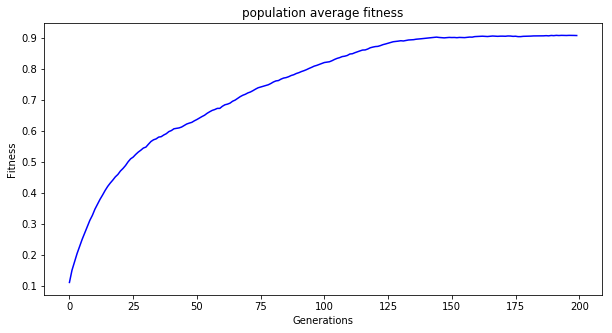

In [23]:
plt.figure(figsize=(10,5))
plt.plot(pop_fit, 'b-', label='population average fitness')
plt.title('population average fitness')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()